### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
### Implimentations:
Examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Imported Basic Library

In [2]:
df_churn=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Read Dataset and displayed head of dataset

In [3]:
#lets chcek the null values in the dataset
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

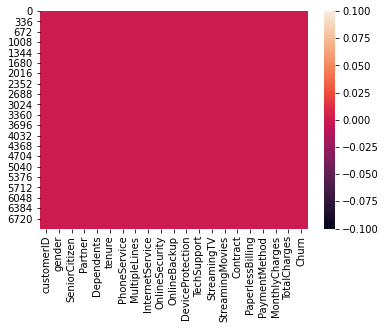

In [4]:
sns.heatmap(df_churn.isnull())

Graphysical Representations of null value.We can see in the entire dataset there are no null values.

In [5]:
#Lets chcek the datatypes of columns
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Seeing below datatypes on thing is clear that Total charges need to converted to float

In [6]:
#Lets do the conversion of "TotalCharges" column to float type
df_churn["TotalCharges"]=df_churn["TotalCharges"].str.strip()
df_churn["TotalCharges"]=pd.to_numeric(df_churn["TotalCharges"])
df_churn["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
#Lets chcek the datatypes again
df_churn.dtypes
#Hence we observe datatype has been changed to float for "TotalCharges"

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

But above conversion genrated null values in TotalCharges column

In [9]:
df_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


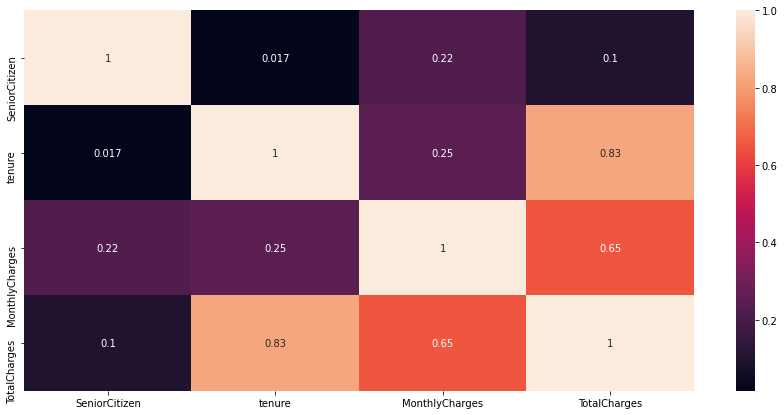

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_churn.corr(),annot=True)

In [11]:
df_churn["TotalCharges"].fillna(df_churn["TotalCharges"].mean(),inplace=True)

imputing the genrated null values with mean in "TotalCharges"

In [12]:
df_churn.drop(columns=["customerID"],inplace=True)


Delete "customerID" column as it will not add any significance to the model building process

In [13]:
#Lets chcek the value counts of each column of object datatype
for col in df_churn.columns:
    if df_churn[col].dtype=="object":
        print(df_churn[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

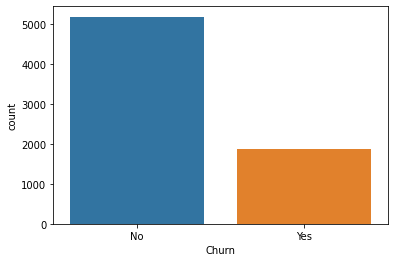

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=df_churn)

this shows dataset is imbalanced hence auc roc curve should be the metric

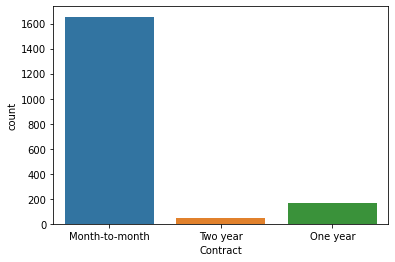

In [15]:
sns.countplot(x="Contract",data=df_churn.loc[df_churn["Churn"]=="Yes"])

Customers who have churned are mostly having contract of "Month to Month"

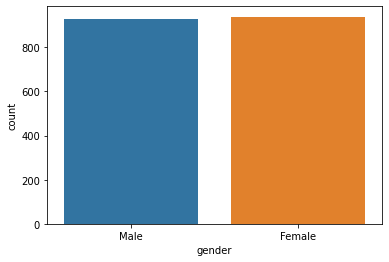

In [16]:
sns.countplot(x="gender",data=df_churn.loc[df_churn["Churn"]=="Yes"])

So boh type of genders equally churned

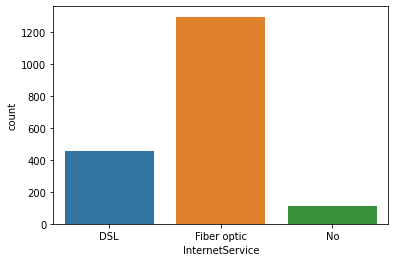

In [17]:
sns.countplot(x="InternetService",data=df_churn.loc[df_churn["Churn"]=="Yes"])

High amount of people i.e more than 1200 who churned are having InternetService of Fiber optic type
So may be this type of service is bad and needs to be focussed on

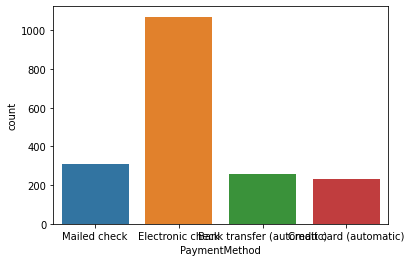

In [18]:
sns.countplot(x="PaymentMethod",data=df_churn.loc[df_churn["Churn"]=="Yes"])

Here we obseved churn is higher around 1100 i.e more than 50% of churn where customers are using "Electronic check"
We can say this mode of payment has multiple issues because of which customers are dissatisfied

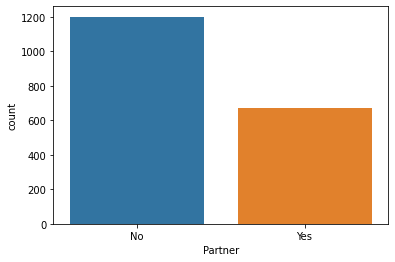

In [19]:
sns.countplot(x="Partner",data=df_churn.loc[df_churn["Churn"]=="Yes"])

churn in unmarried persons are more compared to married eventhough both type of customers almost equally exist in dataset

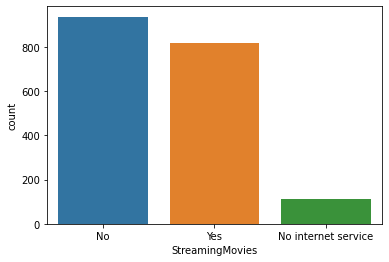

In [20]:
sns.countplot(x="StreamingMovies",data=df_churn.loc[df_churn["Churn"]=="Yes"])

The count of customers churn on the basis "StreamingMovies"

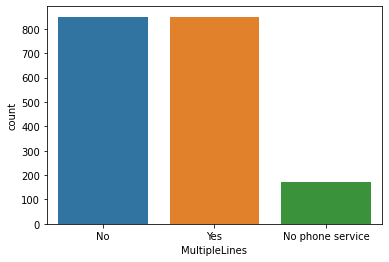

In [21]:
sns.countplot(x="MultipleLines",data=df_churn.loc[df_churn["Churn"]=="Yes"])

The count of customers churn on the basis "MultipleLines"

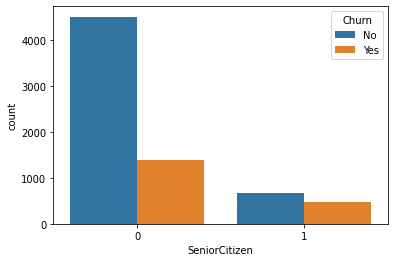

In [22]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df_churn)

Most of the senior citizens churned ...we could inspect the reason for their churn

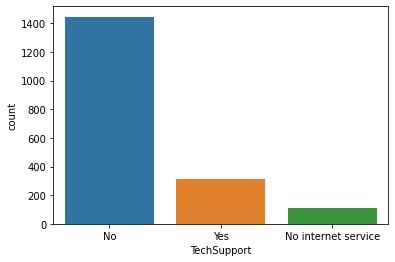

In [23]:
sns.countplot(x="TechSupport",data=df_churn.loc[df_churn["Churn"]=="Yes"])

Around 1400 people who churned were not having TechSupport
We should chcek the reason behind this too

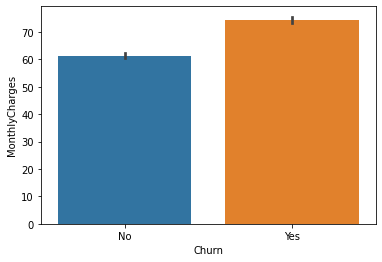

In [24]:
sns.barplot(x="Churn",y="MonthlyCharges",data=df_churn)

customers who churned were charged more than who didnt

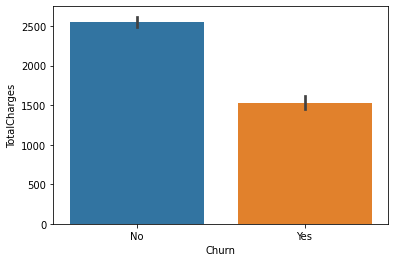

In [25]:
sns.barplot(x="Churn",y="TotalCharges",data=df_churn)

customers who didnt chuned has averge total charges more

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_churn.columns:
    if df_churn[col].dtype=="object":
        df_churn[col]=le.fit_transform(df_churn[col])

In [27]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [28]:
from scipy.stats import zscore
z_score=abs(zscore(df_churn))
print(df_churn.shape)
df_churn_final=df_churn.loc[(z_score<3).all(axis=1)]
print(df_churn_final.shape)

(7043, 20)
(6361, 20)


In [29]:
#Lets divide the dataset into input and output
df_x=df_churn.drop(columns=["Churn"])
y=df_churn[["Churn"]]

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df_x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

Try to find out most important Feature from all feature.

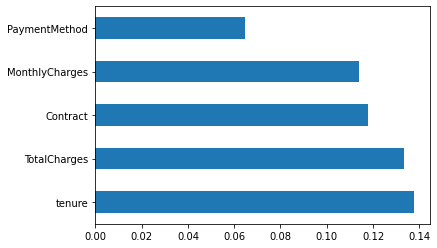

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_x.columns)
feat_importances.nlargest(5).plot(kind='barh')


Displayed there are 5 most important features of dataset.

In [32]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64
Total count of numeric features:  19
count of features which are significantly skewed:  5


In [33]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.cbrt(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.cbrt(df_x[index])
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.269626
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
dtype: float64
Total count of numeric features:  19
count of features which are significantly skewed:  3


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Data is imbalance so applied SMOTE and we will focus on auc-roc score and build a functions for finding random state where auc roc is maximum.

In [36]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7509183910718438
auc roc score corresponding to  43  is  0.7821617711643287
auc roc score corresponding to  44  is  0.7816334702523962
auc roc score corresponding to  45  is  0.7463122271306414
auc roc score corresponding to  46  is  0.7585354827042806
auc roc score corresponding to  47  is  0.7429641685396161
auc roc score corresponding to  48  is  0.7678601875532822
auc roc score corresponding to  49  is  0.7626921387790953
auc roc score corresponding to  50  is  0.7512891058926865
auc roc score corresponding to  51  is  0.7748818104316825
auc roc score corresponding to  52  is  0.7699385155906895
auc roc score corresponding to  53  is  0.7727698984732233
auc roc score corresponding to  54  is  0.765478312537136
auc roc score corresponding to  55  is  0.7783642047069157
auc roc score corresponding to  56  is  0.7430429615851611
auc roc score corresponding to  57  is  0.7675230566534914
auc roc score corresponding to  58  is  0.770196853444935

94

Using logistic regression max auc roc score corresponding to  44  is  0.785644165439562
44.

In [37]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8466662940654093
standard deviation in roc auc score for logistic classifier:  0.009816413595564077
[0.86060089 0.85573898 0.83467023 0.84053049 0.84179087]


In [38]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6620656694825493
auc roc score corresponding to  43  is  0.6700198920147769
auc roc score corresponding to  44  is  0.6740977550440467
auc roc score corresponding to  45  is  0.6301712779973649
auc roc score corresponding to  46  is  0.6707949055775142
auc roc score corresponding to  47  is  0.6615489937740576
auc roc score corresponding to  48  is  0.6297217701309774
auc roc score corresponding to  49  is  0.6528197576790927
auc roc score corresponding to  50  is  0.637518406572115
auc roc score corresponding to  51  is  0.6569544550362966
auc roc score corresponding to  52  is  0.6639308687902039
auc roc score corresponding to  53  is  0.6578754294866828
auc roc score corresponding to  54  is  0.6485623498411223
auc roc score corresponding to  55  is  0.6813441318556408
auc roc score corresponding to  56  is  0.6343279340721796
auc roc score corresponding to  57  is  0.6644023353742023
auc roc score corresponding to  58  is  0.664593505386344

92

Using DecisionTreeClassifier max auc roc score corresponding to  96  is  0.6862086336510889
96

In [39]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6526288775332736
standard deviation in auc roc score for decision tree classifier:  0.019099621610184296
[0.67071095 0.65906637 0.64729133 0.62202795 0.66979515]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500]
criterion=['entropy','gini']
min_samples_split=[2,5,8]
min_samples_leaf=[1,2,4]
parameters={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 500}

In [41]:
rf_clf=RandomForestClassifier(n_estimators=500,criterion='entropy',min_samples_leaf=4,min_samples_split=2,)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7295293084295641
auc roc score corresponding to  43  is  0.7476956263401278
auc roc score corresponding to  44  is  0.7277545273708956
auc roc score corresponding to  45  is  0.723440285204991
auc roc score corresponding to  46  is  0.7263388359296288
auc roc score corresponding to  47  is  0.7186429512516469
auc roc score corresponding to  48  is  0.7262264589630318
auc roc score corresponding to  49  is  0.7166770001808365
auc roc score corresponding to  50  is  0.7157108166059571
auc roc score corresponding to  51  is  0.7287878787878788
auc roc score corresponding to  52  is  0.7368880622077554
auc roc score corresponding to  53  is  0.7400113668655869
auc roc score corresponding to  54  is  0.7313157146916738
auc roc score corresponding to  55  is  0.7492120695445504
auc roc score corresponding to  56  is  0.7111046526647549
auc roc score corresponding to  57  is  0.7239569609134826
auc roc score corresponding to  58  is  0.730416698958898

61

Using RandomForestClassifier max auc roc score corresponding to  87  is  0.756346069389547687

In [49]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for RandomForest classifier: ",cross_val_score(rf_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for RandomForest classifier: ",cross_val_score(rf_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for RandomForest classifier:  0.842037444766157
standard deviation in roc auc score for RandomForest classifier:  0.012467270950241891
[0.85507246 0.85493554 0.82572916 0.83376462 0.84265197]


In [42]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
import warnings 
warnings.filterwarnings("ignore") 
leaf_size = list(range(1,10)) 
n_neighbors = list(range(1,30)) 
p=[1,2] 
parameters={"n_neighbors":n_neighbors,"leaf_size":leaf_size, "p":p} 
kc=KNeighborsClassifier() 
clf = GridSearchCV(kc, parameters, cv=3,scoring="roc_auc") 
clf.fit(x,y) 
clf.best_params_

{'leaf_size': 2, 'n_neighbors': 28, 'p': 1}

In [43]:
kc=KNeighborsClassifier(n_neighbors=28, leaf_size=1,p=1 )
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7449972874525305
auc roc score corresponding to  43  is  0.7678033532253481
auc roc score corresponding to  44  is  0.7586698183884883
auc roc score corresponding to  45  is  0.7484125138856597
auc roc score corresponding to  46  is  0.7387170942158154
auc roc score corresponding to  47  is  0.7339985533080162
auc roc score corresponding to  48  is  0.7353806608282313
auc roc score corresponding to  49  is  0.7419527758402439
auc roc score corresponding to  50  is  0.7291340515125682
auc roc score corresponding to  51  is  0.7611188612467384
auc roc score corresponding to  52  is  0.7625345526880053
auc roc score corresponding to  53  is  0.7507272210597018
auc roc score corresponding to  54  is  0.7400539926115373
auc roc score corresponding to  55  is  0.765500271254747
auc roc score corresponding to  56  is  0.7237864579296805
auc roc score corresponding to  57  is  0.7394249399364489
auc roc score corresponding to  58  is  0.753580562659846

79

In [50]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for KNeighbors classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for KNeighbors classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for KNeighbors classifier:  0.8295712539449548
standard deviation in roc auc score for KNeighbors classifier:  0.012035979563568366
[0.84854814 0.8389806  0.8180139  0.82066286 0.82165077]


Using KNeighborsClassifier max auc roc score corresponding to random state 93 is 0.7589801016452752

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [45]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.7484925986204759
auc roc score corresponding to  43  is  0.7654343951019144
auc roc score corresponding to  44  is  0.7653220181353173
auc roc score corresponding to  45  is  0.7466390245162623
auc roc score corresponding to  46  is  0.7522113720323439
auc roc score corresponding to  47  is  0.7293600971350332
auc roc score corresponding to  48  is  0.7462683096954197
auc roc score corresponding to  49  is  0.74578521790798
auc roc score corresponding to  50  is  0.7373143196672608
auc roc score corresponding to  51  is  0.7436733059495209
auc roc score corresponding to  52  is  0.7603451393732725
auc roc score corresponding to  53  is  0.7413366400578676
auc roc score corresponding to  54  is  0.7666589165310393
auc roc score corresponding to  55  is  0.7689955824226924
auc roc score corresponding to  56  is  0.7294388901805782
auc roc score corresponding to  57  is  0.7336407553798858
auc roc score corresponding to  58  is  0.7679170218812164

75

Using GradientBoostingClassifier max auc roc score corresponding to random state 80 is 0.7239210957016109

In [51]:
#Lets choose svm as our final model and random state 82
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 70,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[774 261]
 [ 76 298]]
f1 score is :  0.6387995712754555
classification report 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

AUC ROC Score:  0.7723087654033945


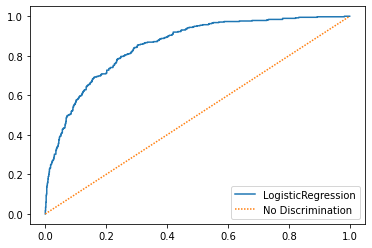

In [56]:
from sklearn.metrics import roc_curve,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='LogisticRegression')
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(1, 1))
plt.legend()

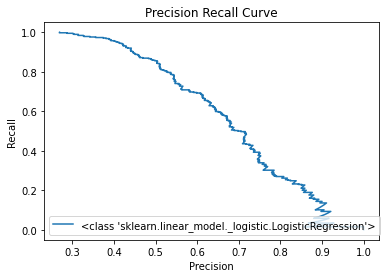

In [58]:
precision, recall, thresholds = precision_recall_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(precision,recall, label=LogisticRegression)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()

In [59]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(lg, 'lg_Fraud.obj')
pickle.dump(lg,open('lg_Fraud.pkl','wb'))

Dump the module using both pickle and joblib.